<a href="https://colab.research.google.com/github/OVP2023/IprojectGeorge/blob/main/%D0%9F%D1%83%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D0%BB%D0%BE%D0%B2_%D0%B1%D0%BB%D0%BE%D0%BA_1_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Модуль 1. Программные средства анализа данных. Задание 1: Анализ таблиц



In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Загружаем  constituents-financials.csv файл таблицы средствами pandas
df = pd.read_csv("https://raw.githubusercontent.com/OVP2023/IprojectGeorge/main/constituents-financials.csv")
#Выведите на экран 5 первых строк загруженной таблицы
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,A,Agilent Technologies Inc,Health Care,65.05,27.45,0.875698,2.10,75.00,49.23,21984606918,1.094000e+09,6.493563,4.56,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AAL,American Airlines Group,Industrials,48.60,9.92,0.778210,3.91,59.08,39.21,24594852352,5.761000e+09,0.580226,6.03,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.55,78.81,8123611867,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.10,131.12,809508034020,7.938600e+10,3.458609,5.66,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.05,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [ ]:
# Узнайте и выведите на экран размер таблицы
df.shape

(505, 14)

In [ ]:
#Перечислите все столбцы. Для каждого столбца укажите тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    int64  
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 55.4+ KB


In [ ]:
#Сгруппируйте таблицу по значениям столбца Sector, посчитайте количество строк, оказавшихся в каждой группе
df["Sector"].value_counts()

Sector
Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: count, dtype: int64

In [ ]:
#Посчитайте количество строк с записями для отрасли Industrials (столбец Sector).
df[df["Sector"]=="Industrials"].shape[0]

67

In [ ]:
#Найдите и посчитайте количество строк, содержащих пропущенные значения.
df.isna().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

In [ ]:
#Проверьте, есть ли в группе Industrials хоть одна фирма с аббревиатурой (столбец Symbol), начинающейся на букву "А".
ser=pd.Series(df["Symbol"][df['Sector']=="Industrials"])
ser.str.count('^A').sum()
#В группе Industrials в столбце Symbol есть 7 фирм аббревиатура которых начинается на A

7

In [ ]:
ser.head(15)

1       AAL
27      ALK
29     ALLE
33      AME
43      AOS
50     ARNC
57      AYI
59       BA
82      CAT
96     CHRW
106     CMI
112     COL
121     CSX
122    CTAS
130     DAL
Name: Symbol, dtype: object

In [ ]:
#Посчитайте и запишите как столбец разницу максимального и минимального значений из столбца Price для каждой группы.
dff=pd.DataFrame(df['Price'].groupby(df['Sector']).agg(max)-df['Price'].groupby(df['Sector']).agg(min))
dff['Sector']=dff.index
dff

,Price,Sector
Sector,,
Consumer Discretionary,1795.63,Consumer Discretionary
Consumer Staples,188.77,Consumer Staples
Energy,166.34,Energy
Financials,496.00,Financials
Health Care,575.80,Health Care
Industrials,319.85,Industrials
Information Technology,996.49,Information Technology
Materials,370.49,Materials
Real Estate,395.97,Real Estate


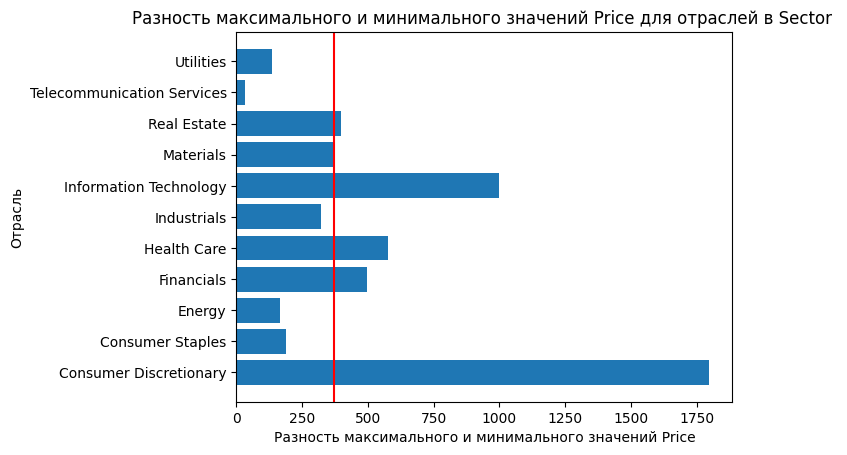

In [ ]:
#Отобразите результат в виде столбчатого графика, настройте график, подпишите оси, легенду графика, название графика.
plt.barh(dff['Sector'], dff['Price'])
plt.title("Разность максимального и минимального значений Price для отраслей в Sector ")
plt.xlabel("Разность максимального и минимального значений Price")
plt.ylabel("Отрасль")
#Отобразите медианное значение линией красного цвета.
plt.axvline(x=dff['Price'].median(),color='r')

In [ ]:
#Разбейте столбец Price на 5 интервалов. Выведите на экран название (Name) фирмы, у которой цена (Price) входит в интервал Exclusive.
df["Price"].describe()

count     505.000000
mean      103.830634
std       134.427636
min         2.820000
25%        46.250000
50%        73.920000
75%       116.540000
max      1806.060000
Name: Price, dtype: float64

In [ ]:
df["Price"].quantile(0.95)

240.968

In [ ]:
#Делим столбец Price на 5 групп: Super low [2.82,46.25], Low ]46.25,73.92],Middle ]73.92,116.54],Hight ]116.54,240.968], Exclusive ]240.968,1806.06]

In [ ]:
#Выведите на экран название (Name) фирмы, у которой цена (Price) входит в интервал Exclusive.
df["Name"][df["Price"]>240.968]

38              Amazon.com Inc
58                AutoZone Inc
59              Boeing Company
69                 Biogen Inc.
71                   BlackRock
97      Charter Communications
105     Chipotle Mexican Grill
163                    Equinix
206       Alphabet Inc Class C
207       Alphabet Inc Class A
212        Goldman Sachs Group
214       Grainger (W.W.) Inc.
239                Humana Inc.
254    Intuitive Surgical Inc.
286      Lockheed Martin Corp.
309          Mohawk Industries
325             Mettler Toledo
334               Netflix Inc.
339     Northrop Grumman Corp.
354        O'Reilly Automotive
360          Priceline.com Inc
391      Everest Re Group Ltd.
393                  Regeneron
401         Roper Technologies
411           Sherwin-Williams
436            TransDigm Group
Name: Name, dtype: object